# Testing of QC Implementation of  multiplication of two variable in  $𝐺𝐹(2^4)$

Author:Sukhsagar Dubey

Advisor: Dr. Utsav Banerjee

Project:Implementation of Quantum Circuits for Cryptanalysis and Signal Processing Applications

In [4]:
import numpy as np
#Importing standard Qiskit libraries
from qiskit import quantum_info
import qiskit
from qiskit import QuantumCircuit,transpile,Aer,IBMQ,QuantumRegister,ClassicalRegister,execute
from qiskit.tools.jupyter import*
from qiskit.visualization import*
from qiskit.quantum_info.operators import Operator, Pauli
#from ibm_quantum_widgets import*
#from qiskit.providers.aer import QasmSimulator
#from qiskit import Aer
#Loading your IBM Quantum account(s)
#provider=IBMQ.load_account()
simulator=Aer.get_backend('qasm_simulator')

In [2]:
#Function to give truth table from quantum circuit-
def truth_table(qc,n,t,op_lst):
    '''
    n #number of input (ex n=8 )
    t: total qubit
    qc: testing of quantum circuit
    out_lst: output list (list of label of output qubits) for measurement
    ''' 
    dct={}
    for i in range(2**n):
        ckt1=QuantumCircuit(t,len(op_lst))
        inp=bin(i)[2:].zfill(n)
        for j in range(len(inp)):
            if inp[j]=='1':
                ckt1.x(n-j-1)        
        ckt1.barrier()
        ckt1=ckt1.compose(qc)
        #print(ckt1)
        ckt1.measure(op_lst,list(np.arange(len(op_lst))))
        backend=Aer.get_backend('qasm_simulator')
        job=execute(ckt1,backend, shots=1024)
        result=job.result().get_counts()
        
        dct[str(i)]=list(result)[0]
    print(ckt1)    
    return(dct)    

# Multiplication of two variable  $GF(2^4)$

## Multiplication-1

Let $a,b,c \hspace{1mm} \epsilon \hspace{1mm} GF(2^4)$. $a=\sum_{i=0}^3a_iz^i ,\hspace{2mm} b=\sum_{i=0}^3b_iz^i \hspace{2mm} \&  \hspace{2mm}$
$c=\sum_{i=0}^3c_iz^i \hspace{2mm} $ 

Such that $c=a.b \hspace{1mm} mod \hspace{1mm}h(z)$ and $a_i,b_i,c_i \epsilon \hspace{1mm} GF(2)$.\

Irredcuible polynomial $h(z)=z^4 + z + 1$-

$c_0=a_3b_1+a_2b_2+a_1b_3+a_0b_0$

$c_1=a_3b_2+a_2b_3+a_3b_1+a_2b_2+a_1b_3+a_1b_0+a_0b_1$

$c_2=a_3b_3+a_3b_2+a_2b_3+a_2b_0+a_1b_1+a_0b_2$

$c_3=a_3b_3+a_3b_0+a_2b_1+a_1b_2+a_0b_3$

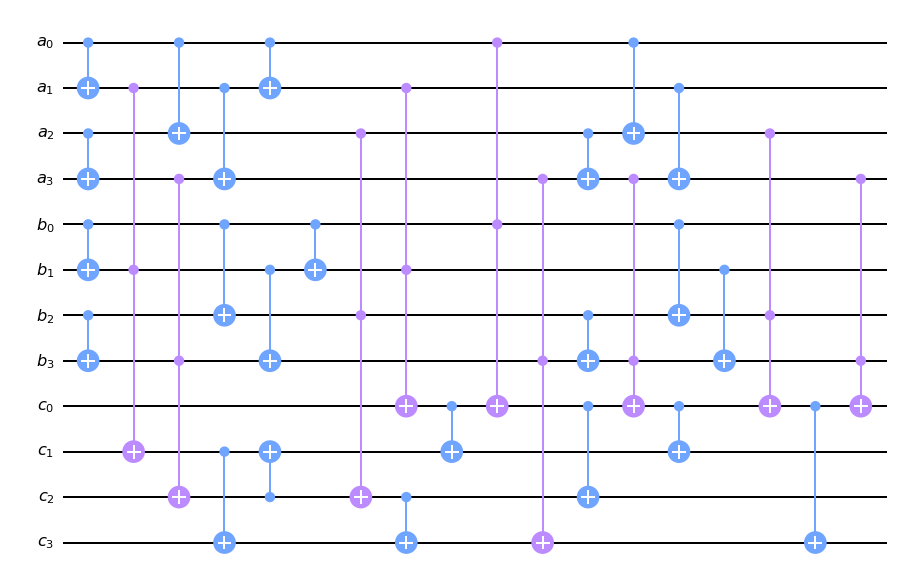

In [62]:
#Multiplication -1
a=QuantumRegister(4,name='a')#Input register
b=QuantumRegister(4,name='b')
c=QuantumRegister(4,name='c')
qc=QuantumCircuit(a,b,c)   #output resiger 
# circuit for Multiplication
qc.cx([0,2,4,6],[1,3,5,7])
qc.ccx([1,3],[5,7],[9,10])
qc.cx([0,4,9,1,5,10,0,4],[2,6,11,3,7,9,1,5])
qc.ccx([2,1],[6,5],[10,8])
qc.cx([8,10],[9,11])
qc.ccx([0,3],[4,7],[8,11])
qc.cx([2,6,8],[3,7,10])
qc.ccx(3,7,8)
qc.cx([0,4,8,1,5],[2,6,9,3,7])
qc.ccx(2,6,8)
qc.cx(8,11)
qc.ccx(3,7,8)
#qc.ccx([3,2,1,3,2,3],[5,6,7,6,7,7],[8,8,8,9,9,10])
Mul_a=qc.to_gate(label='Mult')  
qc.draw('mpl')

In [112]:
op=truth_table(Mul_a,8,12,[8,9,10,11])
print(op)

## Generate truth table for mult 1

'''
n #number of input (ex n=8 )
''' 
dct={}
for i in range(2**n):
    inp=bin(i)[2:].zfill(n)
    b3=int(inp[0])
    b2=int(inp[1])
    b1=int(inp[2])
    b0=int(inp[3])
    a3=int(inp[4])
    a2=int(inp[5])
    a1=int(inp[6])
    a0=int(inp[7])
    c0 = (a3 & b1) ^ (a2 & b2) ^ (a1 & b3) ^ (a0 & b0);
    c1 = (a3 & b2) ^ (a2 & b3) ^ (a3 & b1) ^ (a2 & b2) ^ (a1 & b3) ^ (a1  & b0) ^ (a0 & b1);
    c2 = (a3 & b3) ^ (a3 & b2) ^ (a2 & b3) ^ (a2 & b0) ^ (a1 & b1) ^ (a0 & b2);
    c3 = (a3 & b3) ^ (a3 & b0) ^ (a2 & b1) ^ (a1 & b2) ^ (a0 & b3);
    res=str(c3)+str(c2)+str(c1)+str(c0)
    dct[str(i)]=res
print(dct)

print("---------Testing result ---------------")
print(op==dct)
print("Test Passed")

      ┌───┐ ░ ┌────────┐            
 q_0: ┤ X ├─░─┤0       ├────────────
      ├───┤ ░ │        │            
 q_1: ┤ X ├─░─┤1       ├────────────
      ├───┤ ░ │        │            
 q_2: ┤ X ├─░─┤2       ├────────────
      ├───┤ ░ │        │            
 q_3: ┤ X ├─░─┤3       ├────────────
      ├───┤ ░ │        │            
 q_4: ┤ X ├─░─┤4       ├────────────
      ├───┤ ░ │        │            
 q_5: ┤ X ├─░─┤5       ├────────────
      ├───┤ ░ │   Mult │            
 q_6: ┤ X ├─░─┤6       ├────────────
      ├───┤ ░ │        │            
 q_7: ┤ X ├─░─┤7       ├────────────
      └───┘ ░ │        │┌─┐         
 q_8: ──────░─┤8       ├┤M├─────────
            ░ │        │└╥┘┌─┐      
 q_9: ──────░─┤9       ├─╫─┤M├──────
            ░ │        │ ║ └╥┘┌─┐   
q_10: ──────░─┤10      ├─╫──╫─┤M├───
            ░ │        │ ║  ║ └╥┘┌─┐
q_11: ──────░─┤11      ├─╫──╫──╫─┤M├
            ░ └────────┘ ║  ║  ║ └╥┘
 c: 4/═══════════════════╩══╩══╩══╩═
                         0  1  2  3 
{

## Multiplication-2

Irreducible polynomial $h(z)=z^4 + z^3 + 1$ give Boolean expressions-

$c_0=(a_1+a_3)(b_1+b_3)+(a_2+a_3)(b_2+b_3)+a_0b_0+a_1b_1+a_3b_3$

$c_1=(a_0+a_1)(b_0+b_1)+(a_2+a_3)(b_2+b_3)+a_0b_0+a_1b_1+a_2b_2$

$c_2=(a_0+a_2)(b_0+b_2)+a_0b_0 +a_1b_1+a_2b_2+a_3b_3$ 

$c_3=(a_0+a_1+a_2+a_3)(b_0+b_1+b_2+b_3)+(a_0+a_1)(b_0+b_1)+(a_0+a_2)(b_0+b_2)+a_0b_0 +a_2b_2$

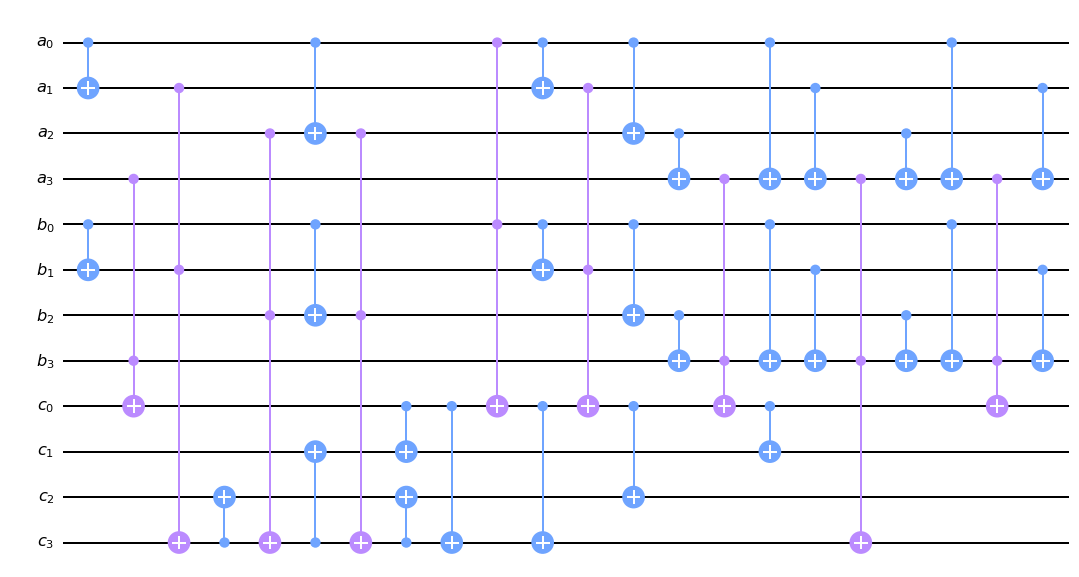

In [11]:
#Multiplication -2
a=QuantumRegister(4,name='a')#Input register
b=QuantumRegister(4,name='b')
c=QuantumRegister(4,name='c')
qc=QuantumCircuit(a,b,c)   #output resiger 
# circuit for Multiplication
qc.cx([0,4],[1,5])
qc.ccx(1,5,11)
qc.cx(11,10)
qc.ccx(2,6,11)
qc.cx([0,4,11],[2,6,9])
qc.ccx(2,6,11)
qc.cx(11,10)
qc.ccx(3,7,8)
qc.cx([8,8],[9,11])
qc.ccx(0,4,8)
qc.cx([0,4,8],[1,5,11])
qc.ccx(1,5,8)
qc.cx([0,4,8],[2,6,10])
qc.cx([2,6],[3,7])
qc.ccx(3,7,8)
qc.cx([0,1,4,5,8],[3,3,7,7,9])
qc.ccx(3,7,11)
qc.cx([2,0,6,4],[3,3,7,7])
qc.ccx(3,7,8)
qc.cx([1,5],[3,7])
Mul_b=qc.to_gate(label='Mult')  
qc.draw('mpl')

In [12]:
op2=truth_table(Mul_b,8,12,[8,9,10,11])
print(op2)

## Generate truth table for mult 2

'''
n #number of input (ex n=8 )
''' 
dct2={}
for i in range(2**n):
    inp=bin(i)[2:].zfill(n)
    b3=int(inp[0])
    b2=int(inp[1])
    b1=int(inp[2])
    b0=int(inp[3])
    a3=int(inp[4])
    a2=int(inp[5])
    a1=int(inp[6])
    a0=int(inp[7])
    c0 = (a1 & b3 ) ^ ( a0 & b0 ) ^ ( a2 & b3 ) ^ ( a3 & b2 ) ^ ( a2 & b2 ) ^ ( a3 & b1 ) ^ ( a3 & b3)
    c1 =( a0 & b1 ) ^ ( a3 & b2 ) ^ ( a3 & b3 ) ^  ( a1 & b0 ) ^ ( a2 & b3)
    c2 = (a0 & b2 ) ^ ( a3 & b3 ) ^ ( a1 & b1 ) ^ ( a2 & b0)
    c3 = (a0 & b3 ) ^ ( a1 & b3 ) ^ ( a3 & b2 ) ^ ( a2 & b3 ) ^ ( a3 & b1 ) ^ ( a2 & b1 ) ^ ( a1 & b2 ) ^ ( a3 & b3 ) ^ ( a3 & b0 ) ^ ( a2 & b2)
    res=str(c3)+str(c2)+str(c1)+str(c0)
    dct2[str(i)]=res
print(dct2)

print("---------Testing result ---------------")
print(op2==dct2)
if (op2==dct2):
    print("Test Passed")
else:
     print("Test Failed")

      ┌───┐ ░ ┌────────┐            
 q_0: ┤ X ├─░─┤0       ├────────────
      ├───┤ ░ │        │            
 q_1: ┤ X ├─░─┤1       ├────────────
      ├───┤ ░ │        │            
 q_2: ┤ X ├─░─┤2       ├────────────
      ├───┤ ░ │        │            
 q_3: ┤ X ├─░─┤3       ├────────────
      ├───┤ ░ │        │            
 q_4: ┤ X ├─░─┤4       ├────────────
      ├───┤ ░ │        │            
 q_5: ┤ X ├─░─┤5       ├────────────
      ├───┤ ░ │   Mult │            
 q_6: ┤ X ├─░─┤6       ├────────────
      ├───┤ ░ │        │            
 q_7: ┤ X ├─░─┤7       ├────────────
      └───┘ ░ │        │┌─┐         
 q_8: ──────░─┤8       ├┤M├─────────
            ░ │        │└╥┘┌─┐      
 q_9: ──────░─┤9       ├─╫─┤M├──────
            ░ │        │ ║ └╥┘┌─┐   
q_10: ──────░─┤10      ├─╫──╫─┤M├───
            ░ │        │ ║  ║ └╥┘┌─┐
q_11: ──────░─┤11      ├─╫──╫──╫─┤M├
            ░ └────────┘ ║  ║  ║ └╥┘
 c: 4/═══════════════════╩══╩══╩══╩═
                         0  1  2  3 
{

## Multiplication-3

Irreducible Polynomial $h(z)=z^4 + z^3 + z^2 + z + 1$ gives below Boolean expressions-

$c_0=(a_1+a_3)(b_1+b_3)+(a_2+a_3)(b_2+b_3)+a_0b_0+a_1b_1$

$c_1=(a_0+a_1)(b_0+b_1)+(a_1+a_3)(b_1+b_3)+a_0b_0+a_2b_2$

$c_2=(a_0+a_2)(b_0+b_2)+(a_1+a_3)(b_1+b_3)+a_0b_0+a_3b_3$

$c_3=(a_0+a_1+a_2+a_3)(b_0+b_1+b_2+b_3)+(a_0+a_1)(b_0+b_1)+(a_0+a_2)(b_0+b_2)+(a_2+a_3)(b_2+b_3)+a_0b_0 $

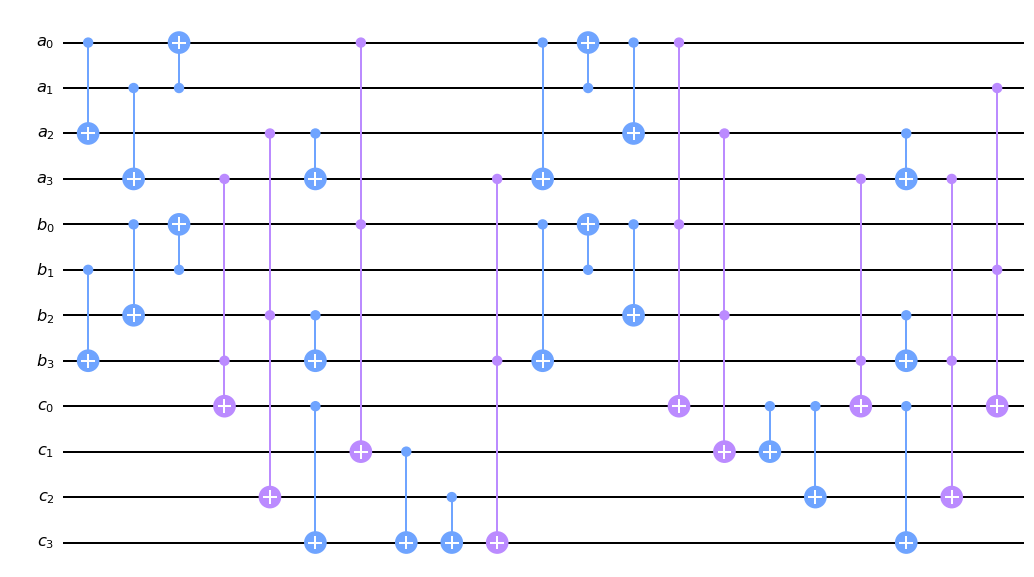

In [13]:
#Multiplication -3
a=QuantumRegister(4,name='a') #Input register
b=QuantumRegister(4,name='b') #Input register
c=QuantumRegister(4,name='c') #output resiger
qc=QuantumCircuit(a,b,c)    
# circuit for Multiplication
qc.cx([0,1,1,4,5,5],[2,3,0,6,7,4])
qc.ccx(3,7,8)
qc.cx(8,11)
qc.ccx(0,4,9)
qc.ccx(2,6,10)
qc.cx([2,6,9,10],[3,7,11,11])
qc.ccx(3,7,11)
qc.cx([0,1,0,4,5,4],[3,0,2,7,4,6])
qc.ccx(0,4,8)
qc.ccx(2,6,9)
qc.cx(8,9)
qc.cx(8,10)
qc.ccx(3,7,8)
qc.cx([2,6,8],[3,7,11])
qc.ccx(3,7,10)
qc.ccx(1,5,8)
#qc.barrier()
Mul_c=qc.to_gate(label='Mult')  
qc.draw('mpl')

In [14]:
op3=truth_table(Mul_c,8,12,[8,9,10,11])
print(op3)

## Generate truth table for mult 3

'''
n=8 #number of input (ex n=8 )
''' 
n=8
dct3={}
for i in range(2**n):
    inp=bin(i)[2:].zfill(n)
    b3=int(inp[0])
    b2=int(inp[1])
    b1=int(inp[2])
    b0=int(inp[3])
    a3=int(inp[4])
    a2=int(inp[5])
    a1=int(inp[6])
    a0=int(inp[7])
    c0 = (a3 & b2 ) ^ ( a1 & b3 ) ^ ( a0 & b0 ) ^ ( a2 & b3 ) ^( a2 & b2 ) ^ ( a3 & b1);
    c1 = (a0 & b1 ) ^ ( a1 & b3 ) ^ ( a1 & b0 ) ^ ( a3 & b1 ) ^ ( a3 & b3 ) ^ ( a2 & b2);
    c2 = (a3 & b1 ) ^ ( a2 & b2 ) ^ ( a1 & b1 ) ^ ( a2 & b0 ) ^ ( a0 & b2 ) ^ ( a1 & b3);
    c3 = (a2 & b1 ) ^ ( a3 & b0 ) ^ ( a3 & b1 ) ^ ( a1 & b2 ) ^ ( a1 & b3 ) ^ ( a2 & b2 ) ^ (a0 & b3);
    res=str(c3)+str(c2)+str(c1)+str(c0)
    dct3[str(i)]=res
print(dct3)

print("---------Testing result ---------------")
print(op3==dct3)
if (op3==dct3):
    print("Test Passed")
else:
     print("Test Failed")

      ┌───┐ ░ ┌────────┐            
 q_0: ┤ X ├─░─┤0       ├────────────
      ├───┤ ░ │        │            
 q_1: ┤ X ├─░─┤1       ├────────────
      ├───┤ ░ │        │            
 q_2: ┤ X ├─░─┤2       ├────────────
      ├───┤ ░ │        │            
 q_3: ┤ X ├─░─┤3       ├────────────
      ├───┤ ░ │        │            
 q_4: ┤ X ├─░─┤4       ├────────────
      ├───┤ ░ │        │            
 q_5: ┤ X ├─░─┤5       ├────────────
      ├───┤ ░ │   Mult │            
 q_6: ┤ X ├─░─┤6       ├────────────
      ├───┤ ░ │        │            
 q_7: ┤ X ├─░─┤7       ├────────────
      └───┘ ░ │        │┌─┐         
 q_8: ──────░─┤8       ├┤M├─────────
            ░ │        │└╥┘┌─┐      
 q_9: ──────░─┤9       ├─╫─┤M├──────
            ░ │        │ ║ └╥┘┌─┐   
q_10: ──────░─┤10      ├─╫──╫─┤M├───
            ░ │        │ ║  ║ └╥┘┌─┐
q_11: ──────░─┤11      ├─╫──╫──╫─┤M├
            ░ └────────┘ ║  ║  ║ └╥┘
 c: 4/═══════════════════╩══╩══╩══╩═
                         0  1  2  3 
{